In [247]:
import sys
sys.path.insert(0, "../")
from tmds import *
%matplotlib inline

1) Нужна таблица по рисунку 6, в которой будут не только количество формул, но и количества уникальных для каждой лабы. сейчас у тебя рисунок, в котором просто количества формул

In [211]:
s = ["CHA", "SFA-Ctk", "SFA-Pw", "SHA-Ctk", "SHA-Pw", "SRHA"]
cities = ["a", "b", "c", "d", "e"]

In [212]:
df = pd.read_csv("data.csv", sep="\t")
df["abundance"] = np.log(df["abundance"])
df["H/C"] = df["H"] / df["C"]
df["O/C"] = df["O"] / df["C"]
df["DBE"] = df["C"] - df["H"]/2 + df["N"]/2 + 1
df.sample(5)

,exp,town,abundance,mw,error,C,H,O,N,S,y,H/C,O/C,DBE
110955,SHA-Pw,e,-4.875495,581.145056,0.180843,40,23,2,1,1,1,0.575000,0.050000,30.0
118427,SRHA,a,-3.195469,754.138116,-0.017547,35,30,19,0,0,3,0.857143,0.542857,21.0
107234,SHA-Pw,e,-4.744423,339.147106,0.140617,20,21,4,1,0,1,1.050000,0.200000,11.0
58225,SFA-Pw,a,-6.369057,552.086346,-0.040434,22,20,15,2,0,2,0.909091,0.681818,14.0
128553,SRHA,c,-4.682556,514.350586,0.033182,28,50,8,0,0,1,1.785714,0.285714,4.0


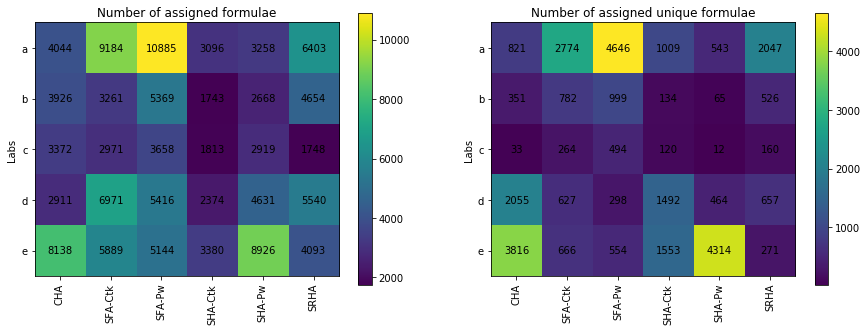

In [213]:
counts = np.zeros((6, 5))
unique = np.zeros((6, 5))
for i in range(6):
    for j in range(5):
        counts[i][j] = len(df[(df["town"] == cities[j]) & (df["exp"] == s[i])])
        unique[i][j] = len(df[(df["town"] == cities[j]) & (df["exp"] == s[i]) & (df["y"] == 1)])
        
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("Number of assigned formulae")
for i in range(6):
    for j in range(5):
        plt.text(i, j, int(counts[i][j]), {'ha': 'center', 'va': 'center'})
plt.imshow(counts.T)
plt.yticks(range(5), cities)
plt.xticks(range(6), s, rotation="vertical")
plt.ylabel("Labs")
plt.colorbar()

plt.subplot(122)

plt.title("Number of assigned unique formulae")
for i in range(6):
    for j in range(5):
        plt.text(i, j, int(unique[i][j]), {'ha': 'center', 'va': 'center'})
plt.imshow(unique.T)
plt.yticks(range(5), cities)
plt.xticks(range(6), s, rotation="vertical")
plt.ylabel("Labs")
plt.colorbar()

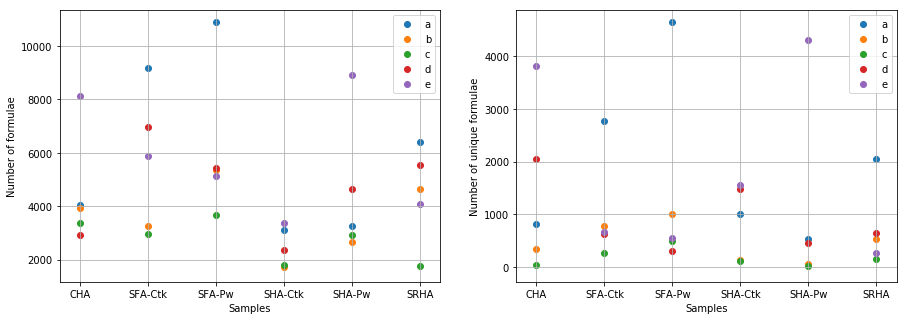

In [245]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.ylabel("Number of formulae")
plt.xlabel("Samples")
for i in range(5):
    plt.scatter(range(6), counts[:, i], label=cities[i])
    
plt.xticks(range(6), s)
plt.legend()
plt.grid()

plt.subplot(122)
plt.ylabel("Number of unique formulae")
plt.xlabel("Samples")
for i in range(5):
    plt.scatter(range(6), unique[:, i], label=cities[i])
    
plt.xticks(range(6), s)
plt.legend()
plt.grid()

2) Для образца SRHA построить две ван Кревелена. На первый будут нанесены только общие для всех лаб формулы, на вторую - только уникальные, с цветовым обозначением лабораторий (a,b,c,d,e)

/usr/local/lib/python2.7/dist-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


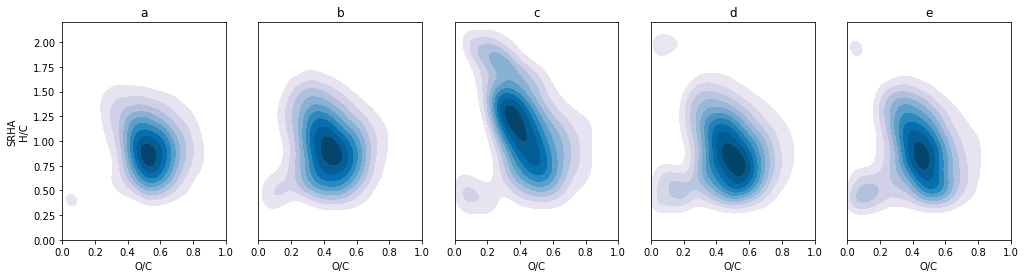

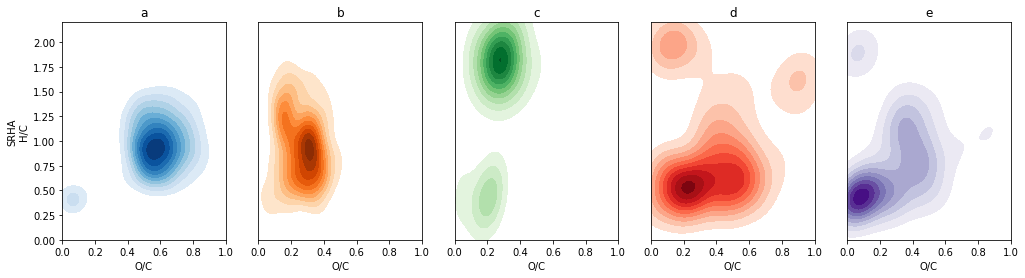

In [249]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

colors = ["Blues", "Oranges", "Greens", "Reds", "Purples"]

plt.figure(figsize=(17, 4))
for j in range(5):
    plt.subplot(151 + j)
    if j == 0:
        plt.ylabel("SRHA" + "\nH/C")
    else:
        plt.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                left=False,      # ticks along the bottom edge are off
                labelleft=False) 
    plt.ylim(0, 2.2)
    plt.xlim(0, 1)
    plt.title(cities[j])
    plt.xlabel("O/C")
    sns.kdeplot(df[(df["exp"] == "SRHA") & 
                   (df["town"] == cities[j])][["O/C", "H/C"]].values, shade = True, cmap = "PuBu", shade_lowest=False)
    

plt.figure(figsize=(17, 4))
for j in range(5):
    plt.subplot(151 + j)
    if j == 0:
        plt.ylabel("SRHA" + "\nH/C")
    else:
        plt.tick_params(
                axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                left=False,      # ticks along the bottom edge are off
                labelleft=False) 
    plt.ylim(0, 2.2)
    plt.xlim(0, 1)
    plt.title(cities[j])
    plt.xlabel("O/C")
    sns.kdeplot(df[(df["exp"] == "SRHA") & 
                   (df["town"] == cities[j]) & 
                   (df["y"] == 1)][["O/C", "H/C"]].values, shade = True, shade_lowest=False, cmap=colors[j])

    

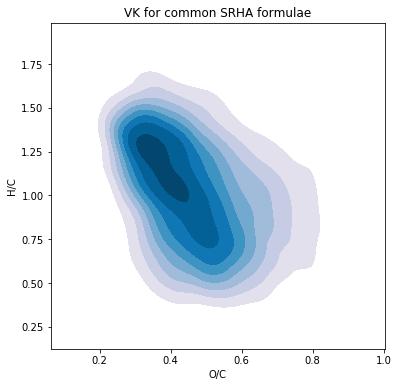

In [250]:
plt.figure(figsize=(6, 6))
plt.title("VK for common SRHA formulae")
plt.xlabel("O/C")
plt.ylabel("H/C")
sns.kdeplot(df[(df["exp"] == "SRHA") & (df["y"] == 5)][["O/C", "H/C"]].values, shade = True, cmap = "PuBu", shade_lowest=False)

/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'beta'
  s)


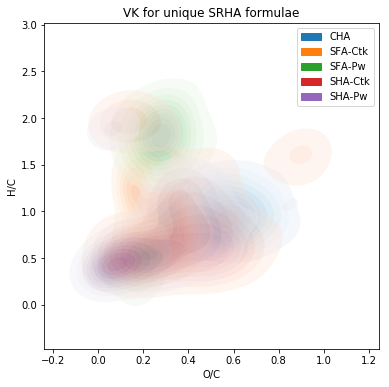

In [251]:
plt.figure(figsize=(6, 6))
plt.title("VK for unique SRHA formulae")
plt.xlabel("O/C")
plt.ylabel("H/C")
colors = ["Blues", "Oranges", "Greens", "Reds", "Purples"]
for j in range(5):
    sns.kdeplot(df[(df["exp"] == "SRHA") & 
                   (df["y"] == 1) & 
                   (df["town"] == cities[j])][["O/C", "H/C"]].values, 
                shade=True, shade_lowest=False, 
                cmap=colors[j], 
                alpha=0.3,
                beta=1000,
                antialiased=True, 
                label=s[j])
    
    
import matplotlib.patches as mpatches

patch = []
for j in range(5):
    patch.append(mpatches.Patch(color=colors[j].lower()[:-1], label=cities[j]))
plt.legend(handles=patch)
plt.legend()

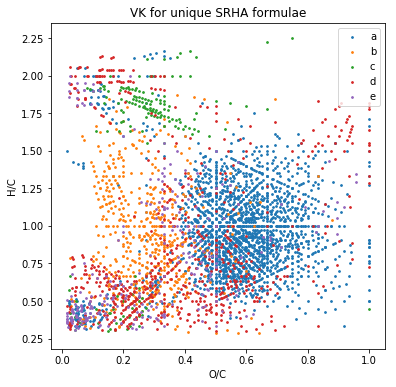

In [258]:
plt.figure(figsize=(6, 6))
plt.title("VK for unique SRHA formulae")
plt.xlabel("O/C")
plt.ylabel("H/C")
for i in range(5):
    t = df[(df["exp"] == "SRHA") & (df["y"] == 1) & (df["town"] == cities[i])][["O/C", "H/C"]].values
    
    plt.scatter(t[:, 0], t[:, 1], label=cities[i], s = 3)
plt.legend()

3) Построить heatmap по Евклидовым расстояниям векторов формул (формула, интенсивность) попарно для образцов и лаб. Картинка такая же, как для корреляций.

In [36]:
abundance = {}
formulae = {}
for i in range(6):
    abundance[i] = {}
    formulae[i] = {}
    for j in range(5):
        tmp = df[(df["exp"] == s[i]) & (df["town"] == cities[j])]
        formulae[i][j] = get_set_of_tuples_from_np(tmp[["C", "H", "O", "N", "S"]].values)

        abundance[i][j] = {}
        for formula, abund in zip(tmp[["C", "H", "O", "N", "S"]].values, tmp["abundance"].values):
            abundance[i][j][tuple(formula)] = abund

corr = np.zeros((30, 30))
ticks = []
for i in range(6):
    for j in range(5):
        ticks.append("{}-{}".format(s[i], cities[j]))
        for k in range(6):
            for e in range(5):
                gen = formulae[i][j] & formulae[k][e]
                corr[i*5 + j][k*5 + e] =  np.corrcoef([map(lambda x: abundance[i][j][x], gen),
                                                       map(lambda x: abundance[k][e][x], gen)])[0][1]            

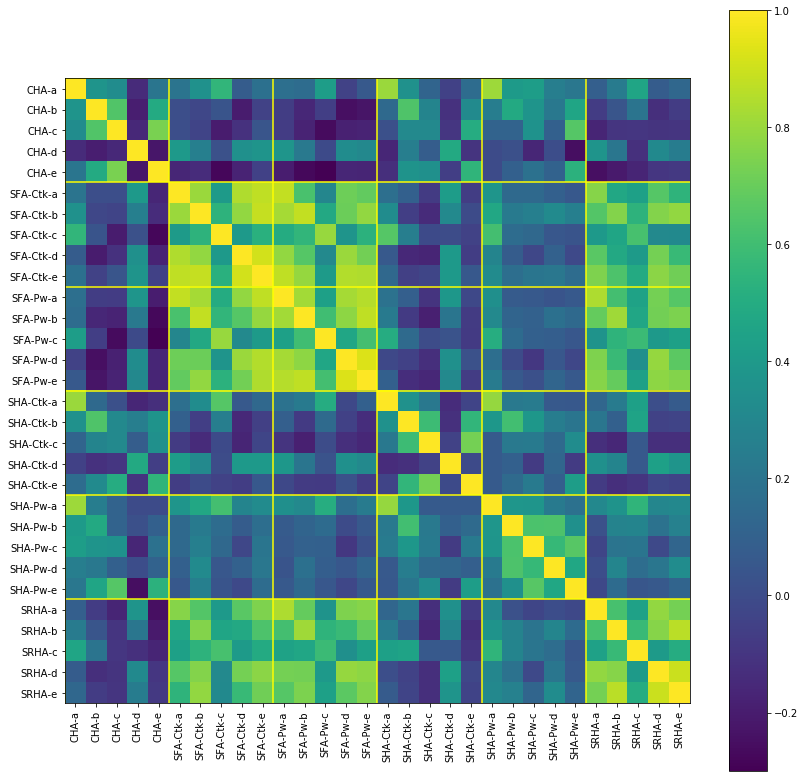

In [37]:
plt.figure(figsize=(14, 14))
plt.imshow(corr)
plt.xticks(range(30), ticks, rotation="vertical")
plt.yticks(range(30), ticks)
for i in range(6):
    plt.plot([i*5-0.5, i*5-0.5], [0-0.5, 30-.5], color="yellow")
    plt.plot([0-0.5, 30-.5], [i*5-0.5, i*5-0.5], color="yellow")
plt.colorbar()
plt.show()


In [42]:
corr = np.zeros((30, 30))
ticks = []
for j in range(5):
    for i in range(6):
        ticks.append("{}-{}".format(s[i], cities[j]))
        for k in range(6):
            for e in range(5):
                gen = formulae[i][j] & formulae[k][e]
                corr[j*6 + i][e*6 + k] =  np.corrcoef([map(lambda x: abundance[i][j][x], gen),
                                                       map(lambda x: abundance[k][e][x], gen)])[0][1]

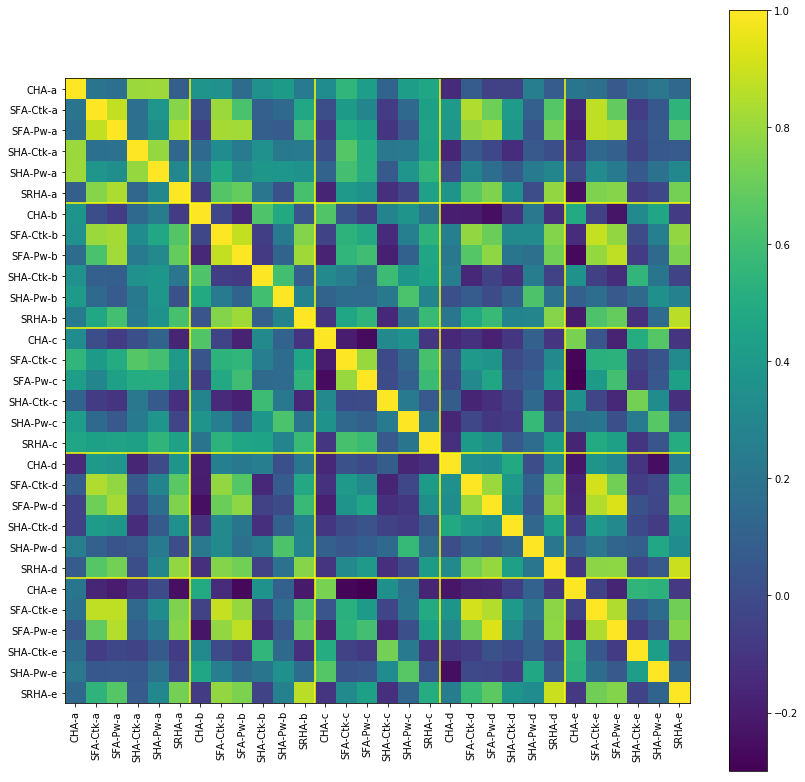

In [43]:
plt.figure(figsize=(14, 14))
plt.imshow(corr)
plt.xticks(range(30), ticks, rotation="vertical")
plt.yticks(range(30), ticks)
for i in range(5):
    plt.plot([i*6-0.5, i*6-0.5], [0-0.5, 30-.5], color="yellow")
    plt.plot([0-0.5, 30-.5], [i*6-0.5, i*6-0.5], color="yellow")
plt.colorbar()
plt.show()


4) Нужно переделать рисунок 7. Использовать в качестве данных не файлы ml-neutral-unambiguous, а файлы ml. В них есть массы и интенсивности. В принципе повторить, просто использовать не массы приписанных формул, а исходные сырые масс-спектры

In [5]:
#There are  data, but in very interesting format...

In [ ]:
towns = {
    # ....
}

towns_new = {
    # ....
}

print os.listdir("mass-lists/")
for t in towns:
    print t
    for sheet, name in zip(towns[t], towns_new[t]):
        table = pd.read_excel("mass-lists/{}.xlsx".format(t), sheet_name=sheet)
        table.to_csv("mass-lists/{}/{}.csv".format(t, name))
        

In [8]:
#Tables are created

In [52]:
#some d fixing (remove "")
"""
for i in s:
    lines = open("mass-lists/d/{}.csv".format(i)).readlines()
    f = open("mass-lists/d/{}.csv".format(i), "w")
    for line in lines:
        f.write(line.replace('"', ""))
    f.close()
"""

'\nfor i in s:\n    lines = open("mass-lists/d/{}.csv".format(i)).readlines()\n    f = open("mass-lists/d/{}.csv".format(i), "w")\n    for line in lines:\n        f.write(line.replace(\'"\', ""))\n    f.close()\n'

In [54]:
files = []
for i in cities:
    files.append([])
    for j in s:
        files[-1].append(pd.read_csv("mass-lists/{}/{}.csv".format(i, j), sep=","))
        files[-1][-1] = files[-1][-1].rename(index=str, 
                                             columns={"mz":"m/z", "M/z":"m/z", "Intensity":"I", "s_n":"S/N"})
        #print list(files[-1][-1][["m/z", "I", "S/N"]])
        files[-1][-1] = files[-1][-1][["m/z", "I", "S/N"]]
files[0][0].sample(5)

,m/z,I,S/N
4826,364.50595,0.0339,5.16
8987,557.20289,0.0416,6.80
2395,295.00956,0.1409,11.61
7267,463.01291,0.0396,5.86
4204,347.00200,0.0393,4.52


In [58]:
for i in range(5):
    for j in range(6):
        files[i][j]["I%"] = files[i][j]["I"] / files[i][j]["I"].max()

In [63]:
#
test = np.searchsorted(files[0][0]["m/z"], files[1][0]["m/z"])

In [128]:
def comparison(a, b):
    a = np.concatenate([[0.], a, [10e5]])
    t = np.searchsorted(a, b)
    return ((np.abs(a[t] - b) / b) < 0.2e-6) | ((np.abs(a[t-1] - b) / b < 0.2e-6))

In [129]:
ans = comparison(files[0][0]["m/z"].values, files[1][0]["m/z"].values)
print ans.sum(), ans.shape
print 100.0*ans.sum()/ans.shape[0]

1857 (19007,)
9.77008470563


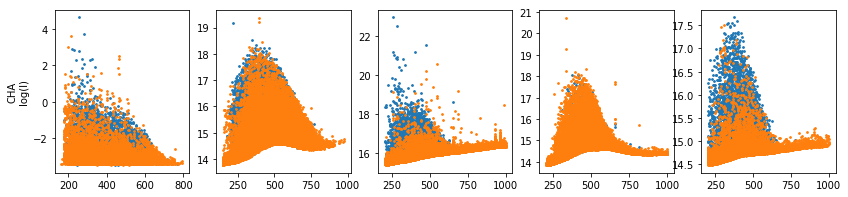

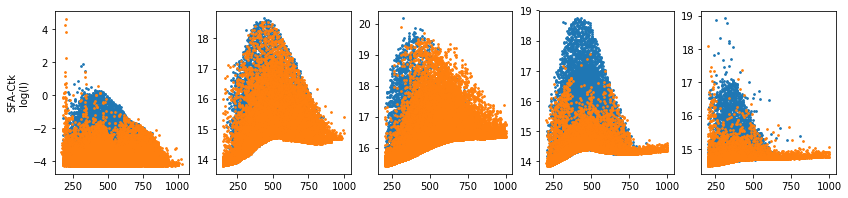

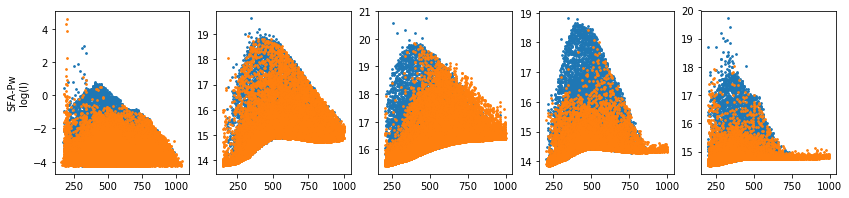

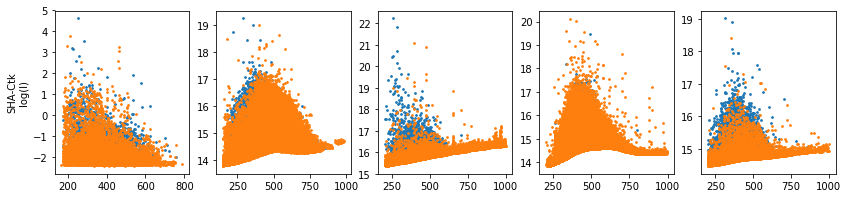

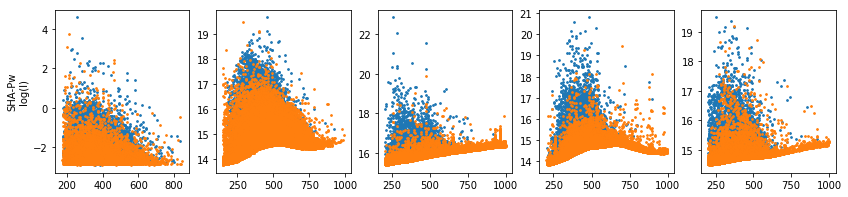

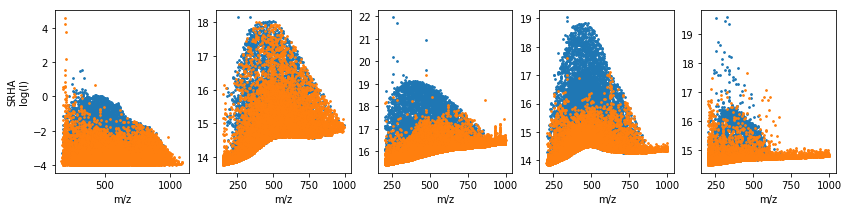

In [259]:
for i in range(6):
    
    plt.figure(figsize=(14, 3))
    
    for j in range(5):
        
        u = np.zeros(len(files[j][i]), dtype=np.bool)
        for k in range(5):
            if k != j:
                u |= comparison(files[k][i]['m/z'].values, files[j][i]["m/z"].values)
        
        plt.subplot(151 + j)
        
        df = files[j][i][u]
        plt.scatter(df["m/z"], np.log(df["I"]), label="Non Unique", s=3)
        
        df = files[j][i][~u]
        plt.scatter(df["m/z"], np.log(df["I"]), label="Unique", s=3)
        
        if i == 5:
            plt.xlabel("m/z")
            
        if j == 0:
            plt.ylabel(s[i] + "\nlog(I)")
        
        #print 100.0 * len(files[i][j][u]) / len(files[i][j])
        

5) Сейчас в отчете есть Рисунок 10. Там показана корреляция для общих формул, которые есть как минимум в n=3 лабах. Сделай, пожалуйста, такие же диаграммы для n = 2,3,4,5. Часть пойдет в основной текст, часть в Supplementary

In [29]:
tmp.tail()

,exp,town,abundance,mw,error,C,H,O,N,S,y,H/C,O/C,DBE
138378,SRHA,e,-1.693123,266.006176,-0.343244,11,6,8,0,0,5,0.545455,0.727273,9.0
138379,SRHA,e,-0.940984,470.121156,-0.300299,24,22,10,0,0,5,0.916667,0.416667,14.0
138382,SRHA,e,-0.854054,360.011666,-0.224046,16,8,10,0,0,5,0.500000,0.625000,13.0
138383,SRHA,e,-1.906771,388.064016,-0.412909,15,16,12,0,0,5,1.066667,0.800000,8.0
138384,SRHA,e,-1.308940,248.032066,-0.089097,12,8,6,0,0,5,0.666667,0.500000,9.0


In [30]:
tmp[["C", "H", "O", "N", "S"]].values[-1], tmp["abundance"].values[-1]

(array([12,  8,  6,  0,  0]), -1.308939512350983)

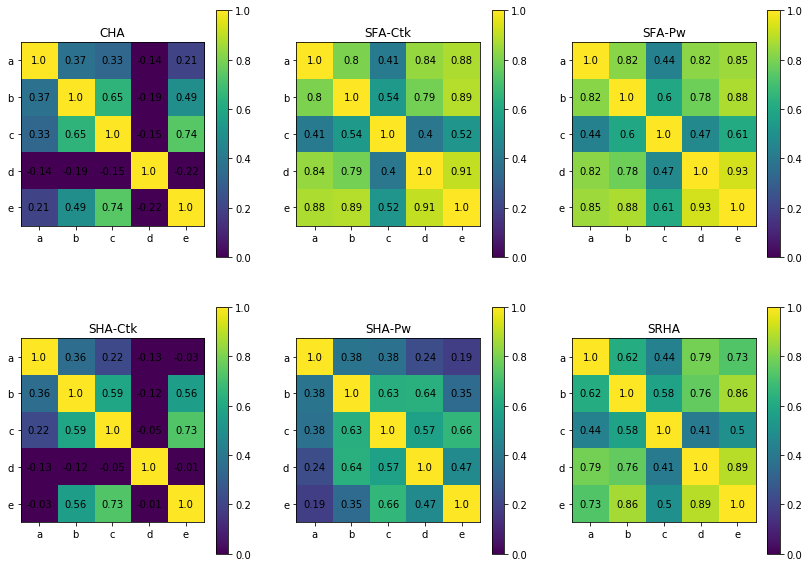

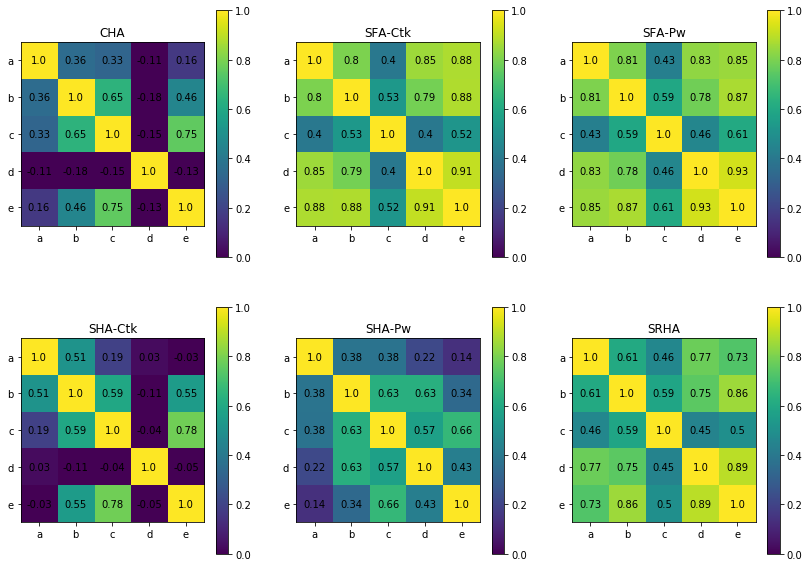

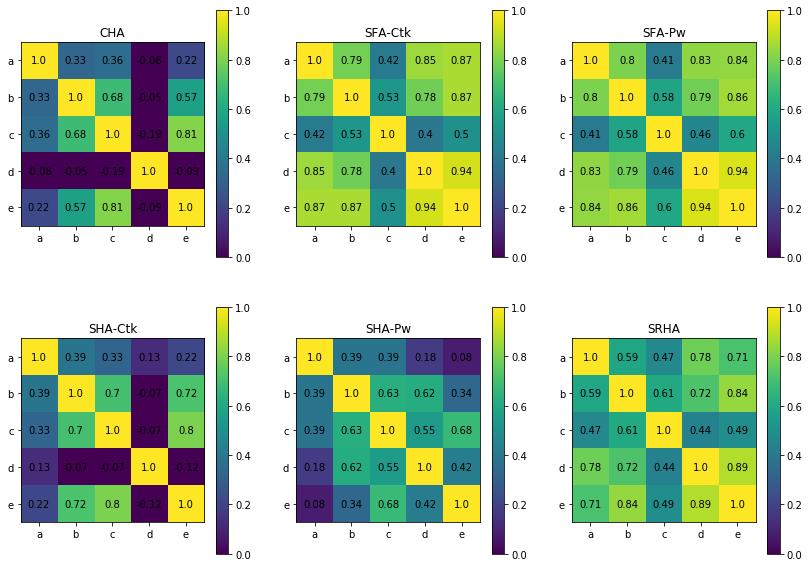

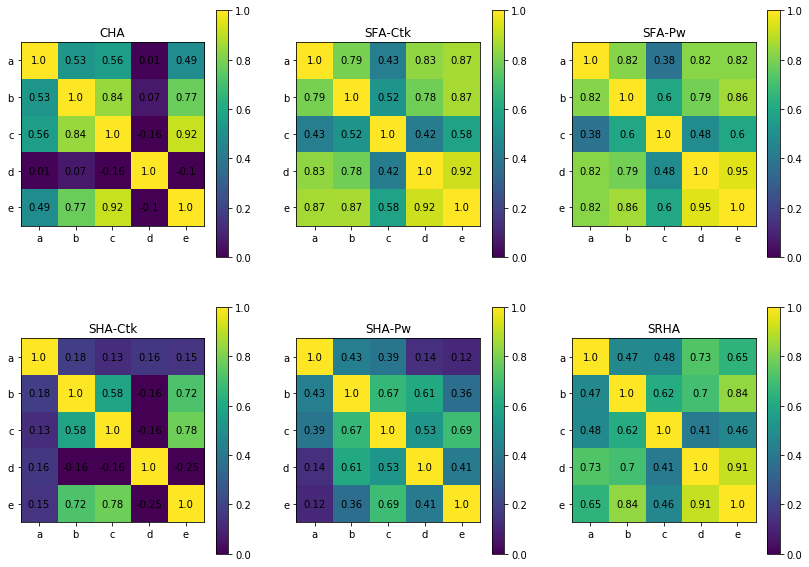

In [17]:
for k in range(2, 6):
    plt.figure(figsize=(14, 10))
    for i in range(6):    
        plt.subplot(231 + i)
        abundance = {}
        formulae = {}
        for j in range(5):
            tmp = df[(df["exp"] == s[i]) & (df["y"] >= k) & (df["town"] == cities[j])]
            formulae[cities[j]] = get_set_of_tuples_from_np(tmp[["C", "H", "O", "N", "S"]].values)

            abundance[cities[j]] = {}
            for formula, abund in zip(tmp[["C", "H", "O", "N", "S"]].values, tmp["abundance"].values):
                abundance[cities[j]][tuple(formula)] = abund
        
        
        corr = np.zeros((5, 5))
        for j in range(5):
            for e in range(5):
                gen = formulae[cities[j]] & formulae[cities[e]]
                
                t = np.corrcoef([map(lambda x: abundance[cities[j]][x], gen),
                                 map(lambda x: abundance[cities[e]][x], gen)])
                
                
                corr[j][e] = np.corrcoef([map(lambda x: abundance[cities[j]][x], gen),
                                          map(lambda x: abundance[cities[e]][x], gen)])[0][1]
                
        plt.title(s[i])
        plt.imshow(corr, vmin=0.0, vmax=1.0)
        plt.colorbar()
        plt.yticks(range(5), cities)
        plt.xticks(range(5), cities)
        for j in range(5):
            for e in range(5):
                plt.text(j, e, np.round(corr[j][e], 2), {'ha': 'center', 'va': 'center'})

6) Наконец, последний рисунок с корреляциями заселенностей. Сделано по диттмару и квадраты. Переделай, пожалуйста, разбиение по квадратам. Сейчас мы весь ван кревелен разбиваем на 20. Будет круто разбить отдельно СНО и CHNO компоненты и получить вектор длинной 40 - по 20 квадратов на каждый класс соединений. Затем снова, как ты сделал, взять ненулевые квадраты, и запилить корреляцию.


In [144]:
df = pd.read_csv("data.csv", sep="\t")
df["abundance"] = np.log(df["abundance"])
df["H/C"] = df["H"] / df["C"]
df["O/C"] = df["O"] / df["C"]
df["DBE"] = df["C"] - df["H"]/2 + df["N"]/2 + 1
df.sample(5)

,exp,town,abundance,mw,error,C,H,O,N,S,y,H/C,O/C,DBE
45458,SFA-Ctk,e,-2.449566,414.137336,-0.012665,15,26,13,0,0,4,1.733333,0.866667,3.0
8919,CHA,c,-2.241623,564.032786,-0.159719,30,12,12,0,0,4,0.400000,0.400000,25.0
121110,SRHA,a,-3.133677,528.147906,0.000078,23,28,14,0,0,4,1.217391,0.608696,10.0
133002,SRHA,d,-1.248628,492.069266,0.008952,25,16,11,0,0,5,0.640000,0.440000,18.0
72600,SFA-Pw,d,-3.427658,489.163456,-0.082533,24,27,10,1,0,5,1.125000,0.416667,12.0


In [ ]:
data = []
for i in range(6):
    data.append([])
    for j in range(5):
        data[-1].append([])
        d = df[(df["town"] == cities[j]) & (df["exp"] == s[i]) & (df["N"] == 0)]
        vc = get_flat_van_krevelen(d)
        for k in range(20):
            data[i][j].append(get_set_of_tuples_from_np(vc[k]["C H O N S".split()].values))
            
        
        
        
tuples = data

In [164]:
data = []
for i in range(6):
    data.append([])
    for j in range(5):
        
        vc = []
        
        d0 = df[(df["town"] == cities[j]) & (df["exp"] == s[i]) & (df["N"] == 0)]
        vc += [len(x) for x in get_flat_van_krevelen(d0)]
        
        d1 = df[(df["town"] == cities[j]) & (df["exp"] == s[i]) & (df["N"] == 1)]
        vc += [len(x) for x in get_flat_van_krevelen(d1)]
        
        data[-1].append(vc)

data = np.array(data)

In [165]:
data.shape




(6, 5, 40)

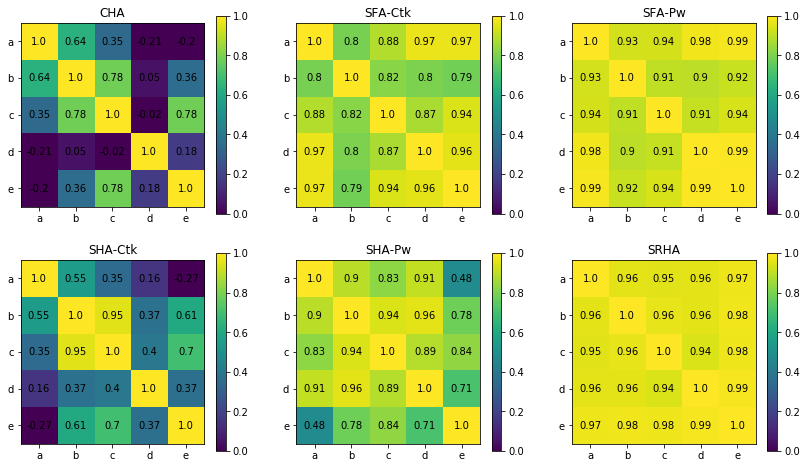

In [210]:
plt.figure(figsize=(14, 8))
for i in range(6):
    plt.subplot(231+i)
    
    plt.title(s[i])
    corr = np.corrcoef(data[i, :, data.min(axis=(0, 1)) > 0].T)
    plt.imshow(corr, vmin=0)
    plt.xticks(range(5), cities)
    plt.yticks(range(5), cities)
    
    for i in range(5):
        for j in range(5):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

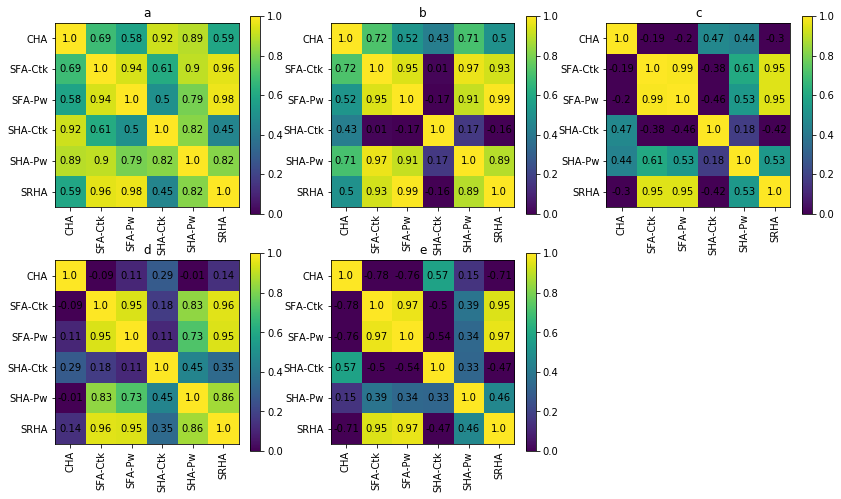

In [242]:
plt.figure(figsize=(14, 8))
for i in range(5):
    plt.subplot(231+i)
    
    plt.title(cities[i])
    corr = np.corrcoef(data[:, i, data.min(axis=(0, 1)) > 0])
    plt.imshow(corr, vmin=0)
    plt.xticks(range(6), s, rotation="vertical")
    plt.yticks(range(6), s)
    
    for i in range(6):
        for j in range(6):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

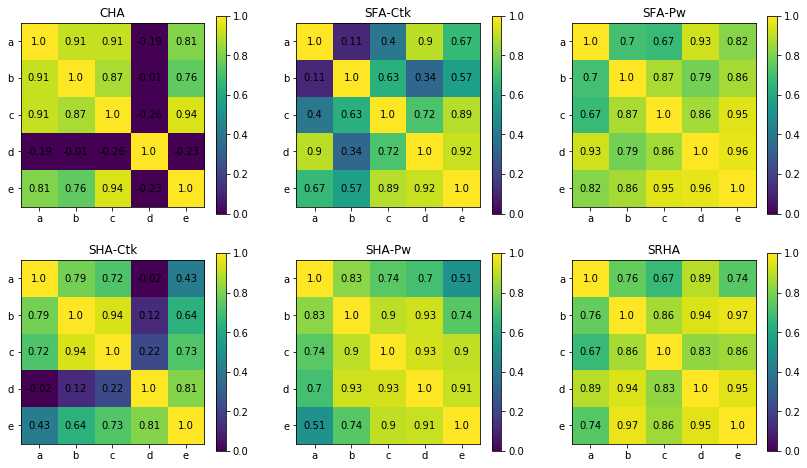

In [235]:
plt.figure(figsize=(14, 8))
for i in range(6):
    plt.subplot(231+i)
    
    plt.title(s[i])
    corr = np.corrcoef(data[i, :, data.mean(axis=(0, 1)) > np.sort(data.mean(axis=(0, 1)))[-10]].T)
    plt.imshow(corr, vmin=0)
    plt.xticks(range(5), cities)
    plt.yticks(range(5), cities)
    
    for i in range(5):
        for j in range(5):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

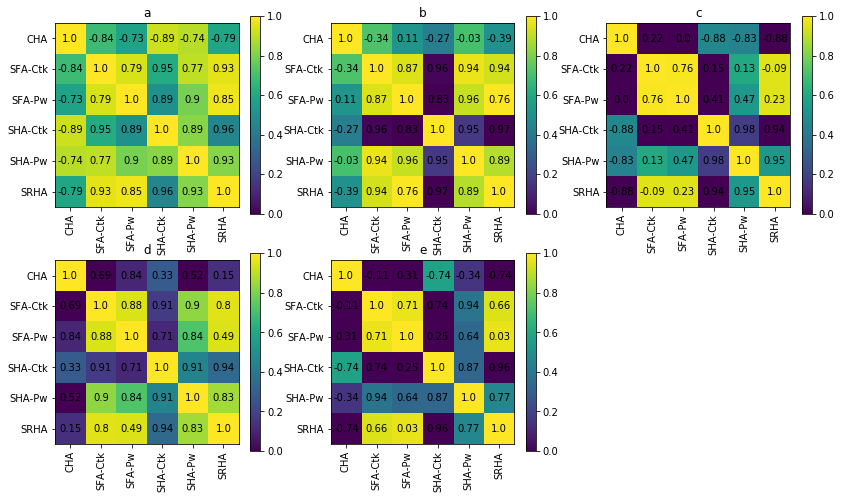

In [236]:
plt.figure(figsize=(14, 8))
for i in range(5):
    plt.subplot(231+i)
    
    plt.title(cities[i])
    corr = np.corrcoef(data[:, i, data.mean(axis=(0, 1)) > np.sort(data.mean(axis=(0, 1)))[-10]].T)
    plt.imshow(np.corrcoef(data[:, i, data.min(axis=(0, 1)) > 0]), vmin=0)
    plt.xticks(range(6), s, rotation="vertical")
    plt.yticks(range(6), s)
    
    for i in range(6):
        for j in range(6):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

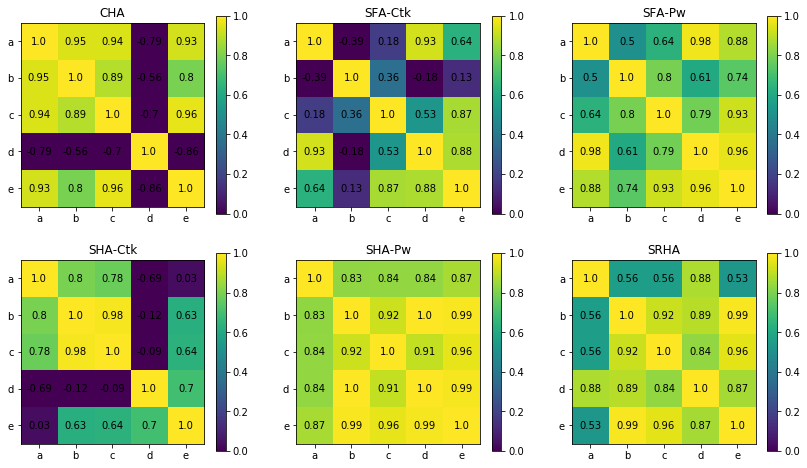

In [237]:
plt.figure(figsize=(14, 8))
for i in range(6):
    plt.subplot(231+i)
    
    plt.title(s[i])
    corr = np.corrcoef(data[i, :, data.mean(axis=(0, 1)) > np.sort(data.mean(axis=(0, 1)))[-5]].T)
    plt.imshow(corr, vmin=0)
    plt.xticks(range(5), cities)
    plt.yticks(range(5), cities)
    
    for i in range(5):
        for j in range(5):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()

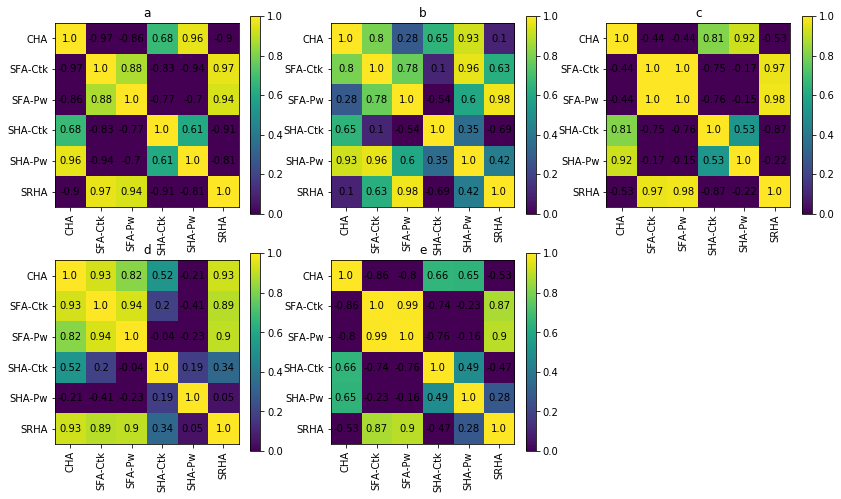

In [244]:
plt.figure(figsize=(14, 8))
for i in range(5):
    plt.subplot(231+i)
    
    plt.title(cities[i])
    corr = np.corrcoef(data[:, i, data.mean(axis=(0, 1)) > np.sort(data.mean(axis=(0, 1)))[-5]])
    plt.imshow(corr, vmin=0)
    plt.xticks(range(6), s, rotation="vertical")
    plt.yticks(range(6), s)
    
    for i in range(6):
        for j in range(6):
            plt.text(i, j, np.round(corr.T[i][j], 2), {'ha': 'center', 'va': 'center'})
    plt.colorbar()